# Name: TAPOMAYEE BASU

# Task: Prediction using Supervised Machine Learning

## Query: Predict the salary of an employee of a company who has 11.2 years of experience using the given Salary dataset.

Here we will see how we can fit a **Simple Linear Regression** model to the given dataset to find the answer of the query.

## 1. Data transformation

In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#importing the dataset

dataset = pd.read_csv("C:\\Users\\Tapomayee Basu\\Downloads\\Salary_Data.csv")

In [3]:
print(dataset.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [4]:
#checking the data structure

print(dataset.shape)

(30, 2)


In [5]:
print(dataset.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [6]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None


In [7]:
#checking whether any missing value is present

print(dataset.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


We see that there is no missing data in the Salary dataset. Hence data cleaning is not needed.

## 2. Data visualization

We visualize the data by plotting a scatter diagram.

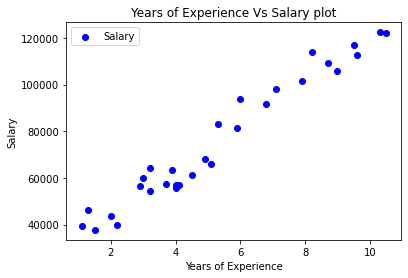

In [8]:
#Scatter diagram of Years of experience vs Salary of the employees

plt.scatter(dataset.YearsExperience, dataset.Salary, label = 'Salary', color = 'b')
plt.title("Years of Experience Vs Salary plot")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

From the diagram, we notice that Years of Experience and Salary of the employee is positively linearly correlated. i.e. they have some positive linear relationship. So we can easily apply **Simple Linear Regression** model to the given Salary dataset.

## 3. Creating our linear model

Dividing the dataset on the basis of independent and dependent variable. Here x denotes the independent(predictor) variable and y denotes the dependent(response) variable. i.e. x is the input and y is the outcome.

In [9]:
#dividing the dataset

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

Next we will split the dataset in train and test data. We will use the training set to build the linear regression model and the testing set to make prediction using the model.

In [10]:
#splitting the dataset in 80-20 ratio

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Now we have 80% of the dataset in training set and the rest is in testing set.

In [11]:
#training the simple linear regression model on the training set

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
#printing the value of intercept and regression coefficient

print("Intercept: ", model.intercept_)
print("Coefficient of the Independent Variable: ", model.coef_)

Intercept:  26780.099150628186
Coefficient of the Independent Variable:  [9312.57512673]


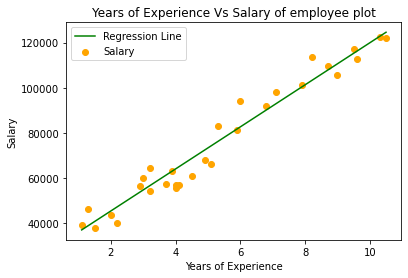

In [13]:
#regression line
prediction_line = model.intercept_ + model.coef_*x

#Visualize Regression Line
plt.scatter(dataset.YearsExperience,dataset.Salary,label='Salary',color='orange')
plt.title("Years of Experience Vs Salary of employee plot")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.plot(x,prediction_line, color = "green", label = "Regression Line")
plt.legend()
plt.show()

Hence, the regression line of y on x is given by, y = 26780.099 + 9312.58x

## 4. Prediction using our model

In [14]:
#predicting test result

y_pred = model.predict(x_test)

In [15]:
#creating dataframe for comparing actual and predicted value

df = pd.DataFrame({"Actual":y_test,"Predicted": y_pred})
df

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


In [16]:
#calculating model accuracy

print("Training Score :", model.score(x_train, y_train))
print("Testing Score :", model.score(x_test, y_test))

Training Score : 0.9411949620562126
Testing Score : 0.988169515729126


## 5. Making prediction about our query

In [17]:
query = 11.2
query_pred= model.predict([[query]])
print("No. of Years of Experince: ", query)
print("Predicted Salary: ", query_pred[0])

No. of Years of Experince:  11.2
Predicted Salary:  131080.9405699951


## 6. Checking error and calculating accuracy

In [18]:
#checking for mean squared error, absolute error and R-squared value

print("Mean squared error: ", metrics.mean_squared_error(y_test, y_pred))
print("Mean absolute error: ", metrics.mean_absolute_error(y_test,y_pred))
print("R-squared value: ", metrics.r2_score(y_test,y_pred))

Mean squared error:  12823412.298126562
Mean absolute error:  2446.1723690465064
R-squared value:  0.988169515729126


We see that our model has R-square value of 0.988169. i.e. Our model gives 98.82% accurate results which is pretty good.

**Comment: If an employee has 11.2 years of experience, his salary would be 131080.94 (in Rs.) (approx).**

## Thank you!